## First Lets understand our dataset and set our goals

- Our data set revolves around customers who leave our subscription
- We have multiple coulmns about each customer plan alongside with some personal inforamtion that might help us


## For the overall understanding segment

- Percantage of churn
- Which features affect the churn rate

## For the modeling segment

- Can we build a reliable model to predict Churn Value based on customer behavior?
- Can we build a risk segmentation (e.g., low/medium/high churn score)?
- Can we predict CLTV and identify high-value customers at risk of churning?

## For making of a rententaion plan

- Different repsones according to what the data tells us
- And also for diffrent types of customers

# But before all that lets import our data and take a look at it 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle

In [2]:
filepath = r'c:\Users\thesu\OneDrive\Desktop\Project Interview\telco.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [4]:
print(f'Range of ages we have is from {df['Age'].min()} to {df['Age'].max()}')
# We will group these in a bit for better segmentation

Range of ages we have is from 19 to 80


#### Lets remove the less than 30 and the senior citzen column since they are redudatnt

In [5]:
df = df.drop(columns=['Under 30'])
df = df.drop(columns=['Senior Citizen'])

In [6]:
df.shape

(7043, 48)

In [7]:
df.head()

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,No,0,United States,California,Los Angeles,90022,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,Yes,Yes,1,United States,California,Los Angeles,90063,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,3,United States,California,Los Angeles,90065,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,Yes,Yes,1,United States,California,Inglewood,90303,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,Yes,Yes,1,United States,California,Whittier,90602,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


#### Also some redudantnt coulmns like Referred a Friend and dependents we already have their numerical value

In [8]:
df = df.drop(columns=['Referred a Friend'])
df = df.drop(columns=['Dependents'])

In [9]:
df.shape

(7043, 46)

In [10]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,Country,State,City,Zip Code,Latitude,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,0,United States,California,Los Angeles,90022,34.023810,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,Yes,1,United States,California,Los Angeles,90063,34.044271,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,3,United States,California,Los Angeles,90065,34.108833,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,Yes,1,United States,California,Inglewood,90303,33.936291,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,Yes,1,United States,California,Whittier,90602,33.972119,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [11]:
df['Country'].nunique()

1

In [12]:
df['State'].nunique()

1

#### As we can see the country and state is the same and it wont affect our data anyway since we have city and their respective coordinates so we can opt to drop them

In [13]:
df = df.drop(columns=['Country'])
df = df.drop(columns=['State'])

In [14]:
df.shape

(7043, 44)

In [15]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,0,Los Angeles,90022,34.023810,-118.156582,68701,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,3,Los Angeles,90065,34.108833,-118.229715,47534,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,Yes,1,Whittier,90602,33.972119,-118.020188,26265,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


#### Now we are going to try to group the ages before running a corr. matrix and a chi squared to figure out which features actually affect the data

In [16]:
def transform_coulmn(df,column_name,new_column):
    def transform(age):
        if age < 25:
            return "18-24"
        elif age < 35:
            return "25-34"
        elif age < 45:
            return "35-44"
        elif age < 55:
            return "45-54"
        elif age < 65:
            return "55-64"
        else:
            return "65+"
    df[new_column] = df[column_name].apply(transform)
    return df

df = transform_coulmn(df,'Age','Age Categories')

In [17]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,Age Categories
0,8779-QRDMV,Male,78,No,0,Los Angeles,90022,34.023810,-118.156582,68701,...,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data,65+
1,7495-OOKFY,Female,74,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,...,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer,65+
2,1658-BYGOY,Male,71,No,3,Los Angeles,90065,34.108833,-118.229715,47534,...,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer,65+
3,4598-XLKNJ,Female,78,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,...,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services,65+
4,4846-WHAFZ,Female,80,Yes,1,Whittier,90602,33.972119,-118.020188,26265,...,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges,65+


In [18]:
df['Age Categories'].value_counts()

Age Categories
35-44    1317
45-54    1286
55-64    1271
25-34    1248
65+      1142
18-24     779
Name: count, dtype: int64

#### Lets drop some unused columns to then convert the rest into numerical before going to the model part


In [19]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason',
       'Age Categories'],
      dtype='object')

We are going to drop:
- Custommer ID
- Zip code
- Latitude
- longitude
- population
- Quarter
- Churn Category 
- Churn Reason

In [20]:
df.drop(columns=['Customer ID', 'Zip Code', 'Latitude', 'Longitude','Population','Quarter', 'Churn Reason', 'Churn Category'], inplace=True, errors='ignore')

In [21]:
pd.set_option('display.max_columns', None)
df.head()

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Age Categories
0,Male,78,No,0,Los Angeles,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,65+
1,Female,74,Yes,1,Los Angeles,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,65+
2,Male,71,No,3,Los Angeles,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,65+
3,Female,78,Yes,1,Inglewood,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,65+
4,Female,80,Yes,1,Whittier,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,65+


In [22]:
label_encoder = LabelEncoder()
df['City_encoded'] = label_encoder.fit_transform(df['City'])
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df['Married_encoded'] = label_encoder.fit_transform(df['Married'])
df['Offer_encoded'] = label_encoder.fit_transform(df['Offer'])
df['Phone_Service_encoded'] = label_encoder.fit_transform(df['Phone Service'])
df['Multiple_Lines_encoded'] = label_encoder.fit_transform(df['Multiple Lines'])
df['Internet_Service_encoded'] = label_encoder.fit_transform(df['Internet Service'])
df['Internet_Type_encoded'] = label_encoder.fit_transform(df['Internet Type'])
df['Online_Security_encoded'] = label_encoder.fit_transform(df['Online Security'])
df['Online_Backup_encoded'] = label_encoder.fit_transform(df['Online Backup'])
df['Device_Protection_Plan_encoded'] = label_encoder.fit_transform(df['Device Protection Plan'])
df['Premium_Tech_Support_encoded'] = label_encoder.fit_transform(df['Premium Tech Support'])
df['Streaming_TV_encoded'] = label_encoder.fit_transform(df['Streaming TV'])
df['Streaming_Movies_encoded'] = label_encoder.fit_transform(df['Streaming Movies'])
df['Streaming_Music_encoded'] = label_encoder.fit_transform(df['Streaming Music'])
df['Unlimited_Data_encoded'] = label_encoder.fit_transform(df['Unlimited Data'])
df['Contract_encoded'] = label_encoder.fit_transform(df['Contract'])
df['Paperless_Billing_encoded'] = label_encoder.fit_transform(df['Paperless Billing'])
df['Payment_Method_encoded'] = label_encoder.fit_transform(df['Payment Method'])
df['Customer_Status_encoded'] = label_encoder.fit_transform(df['Customer Status'])
df['Churn_Label_encoded'] = label_encoder.fit_transform(df['Churn Label'])
df['Age_Categories_encoded'] = label_encoder.fit_transform(df['Age Categories'])

In [23]:
df['Offer'] = df['Offer'].fillna('0')

In [24]:
df

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Age Categories,City_encoded,Gender_encoded,Married_encoded,Offer_encoded,Phone_Service_encoded,Multiple_Lines_encoded,Internet_Service_encoded,Internet_Type_encoded,Online_Security_encoded,Online_Backup_encoded,Device_Protection_Plan_encoded,Premium_Tech_Support_encoded,Streaming_TV_encoded,Streaming_Movies_encoded,Streaming_Music_encoded,Unlimited_Data_encoded,Contract_encoded,Paperless_Billing_encoded,Payment_Method_encoded,Customer_Status_encoded,Churn_Label_encoded,Age_Categories_encoded
0,Male,78,No,0,Los Angeles,0,1,0,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,65+,554,1,0,5,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,5
1,Female,74,Yes,1,Los Angeles,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,65+,554,0,1,4,1,1,1,2,0,1,0,0,0,0,0,1,0,1,1,0,1,5
2,Male,71,No,3,Los Angeles,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,65+,554,1,0,3,1,1,1,2,0,0,0,0,1,1,1,1,0,1,0,0,1,5
3,Female,78,Yes,1,Inglewood,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,65+,448,0,1,2,1,0,1,2,0,1,1,0,1,1,0,1,0,1,0,0,1,5
4,Female,80,Yes,1,Whittier,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,65+,1072,0,1,2,1,1,1,2,0,0,0,0,0,0,0,1,0,1,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,30,No,0,Landers,0,72,0,Yes,22.77,No,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,45,5306,25-34,514,0,0,5,1,0,0,3,0,0,0,0,0,0,0,0,2,1,0,2,0,1
7039,Male,38,Yes,2,Adelanto,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,59,2140,35-44,2,1,1,2,1,1,1,0,1,0,1,1,1,1,1,1,1,1,2,2,0,2
7040,Female,30,Yes,2,Amboy,4,72,0,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,71,5560,25-34,22,0,1,5,1,1,1,2,0,1,1,0,1,1,1,1,1,1,1,2,0,1
7041,Female,32,Yes,2,Angelus Oaks,1,11,0,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,59,2793,25-34,26,0,1,5,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,2,0,1


#### To check what each encoded value refer to with respect to the original

In [25]:
encoded_columns = {
    'City': 'City_encoded',
    'Gender': 'Gender_encoded',
    'Married': 'Married_encoded',
    'Offer': 'Offer_encoded',
    'Phone Service': 'Phone_Service_encoded',
    'Multiple Lines': 'Multiple_Lines_encoded',
    'Internet Service': 'Internet_Service_encoded',
    'Internet Type': 'Internet_Type_encoded',
    'Online Security': 'Online_Security_encoded',
    'Online Backup': 'Online_Backup_encoded',
    'Device Protection Plan': 'Device_Protection_Plan_encoded',
    'Premium Tech Support': 'Premium_Tech_Support_encoded',
    'Streaming TV': 'Streaming_TV_encoded',
    'Streaming Movies': 'Streaming_Movies_encoded',
    'Streaming Music': 'Streaming_Music_encoded',
    'Unlimited Data': 'Unlimited_Data_encoded',
    'Contract': 'Contract_encoded',
    'Paperless Billing': 'Paperless_Billing_encoded',
    'Payment Method': 'Payment_Method_encoded',
    'Customer Status': 'Customer_Status_encoded',
    'Churn Label': 'Churn_Label_encoded',
    'Age Categories': 'Age_Categories_encoded'
}

mappings = {}
for orig_col, enc_col in encoded_columns.items():
    mappings[orig_col] = df[[orig_col, enc_col]].drop_duplicates().sort_values(by=enc_col).reset_index(drop=True)


In [26]:
print(mappings['Age Categories'])

  Age Categories  Age_Categories_encoded
0          18-24                       0
1          25-34                       1
2          35-44                       2
3          45-54                       3
4          55-64                       4
5            65+                       5


Now we drop the non numerical values from the df


In [27]:
def drop_original_columns(df, encoded_columns_dict):
    cols_to_drop = list(encoded_columns_dict.keys())
    df_dropped = df.drop(columns=cols_to_drop)
    return df_dropped

In [28]:
df_clean = drop_original_columns(df, encoded_columns)

In [29]:
df_clean

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV,City_encoded,Gender_encoded,Married_encoded,Offer_encoded,Phone_Service_encoded,Multiple_Lines_encoded,Internet_Service_encoded,Internet_Type_encoded,Online_Security_encoded,Online_Backup_encoded,Device_Protection_Plan_encoded,Premium_Tech_Support_encoded,Streaming_TV_encoded,Streaming_Movies_encoded,Streaming_Music_encoded,Unlimited_Data_encoded,Contract_encoded,Paperless_Billing_encoded,Payment_Method_encoded,Customer_Status_encoded,Churn_Label_encoded,Age_Categories_encoded
0,78,0,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65,3,91,5433,554,1,0,5,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,5
1,74,1,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10,3,69,5302,554,0,1,4,1,1,1,2,0,1,0,0,0,0,0,1,0,1,1,0,1,5
2,71,3,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88,2,81,3179,554,1,0,3,1,1,1,2,0,0,0,0,1,1,1,1,0,1,0,0,1,5
3,78,1,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07,2,88,5337,448,0,1,2,1,0,1,2,0,1,1,0,1,1,0,1,0,1,0,0,1,5
4,80,1,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36,2,67,2793,1072,0,1,2,1,1,1,2,0,0,0,0,0,0,0,1,0,1,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,30,0,0,72,22.77,0,21.15,1419.40,19.31,0,1639.44,3039.53,5,45,5306,514,0,0,5,1,0,0,3,0,0,0,0,0,0,0,0,2,1,0,2,0,1
7039,38,2,1,24,36.05,24,84.80,1990.50,48.23,0,865.20,2807.47,3,59,2140,2,1,1,2,1,1,1,0,1,0,1,1,1,1,1,1,1,1,2,2,0,2
7040,30,2,4,72,29.66,59,103.20,7362.90,45.38,0,2135.52,9453.04,4,71,5560,22,0,1,5,1,1,1,2,0,1,1,0,1,1,1,1,1,1,1,2,0,1
7041,32,2,1,11,0.00,17,29.60,346.45,27.24,0,0.00,319.21,4,59,2793,26,0,1,5,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,2,0,1


In [30]:
print(mappings['Contract'])

         Contract  Contract_encoded
0  Month-to-Month                 0
1        One Year                 1
2        Two Year                 2


In [31]:
df_clean.drop(columns=['Customer_Status_encoded'],inplace=True)

In [32]:
df_clean.drop(columns=['Churn Score'],inplace=True)

## Now for The model

In [ ]:
# Define features and label
X = df_clean.drop(['Churn_Label_encoded'], axis=1)
y = df_clean['Churn_Label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

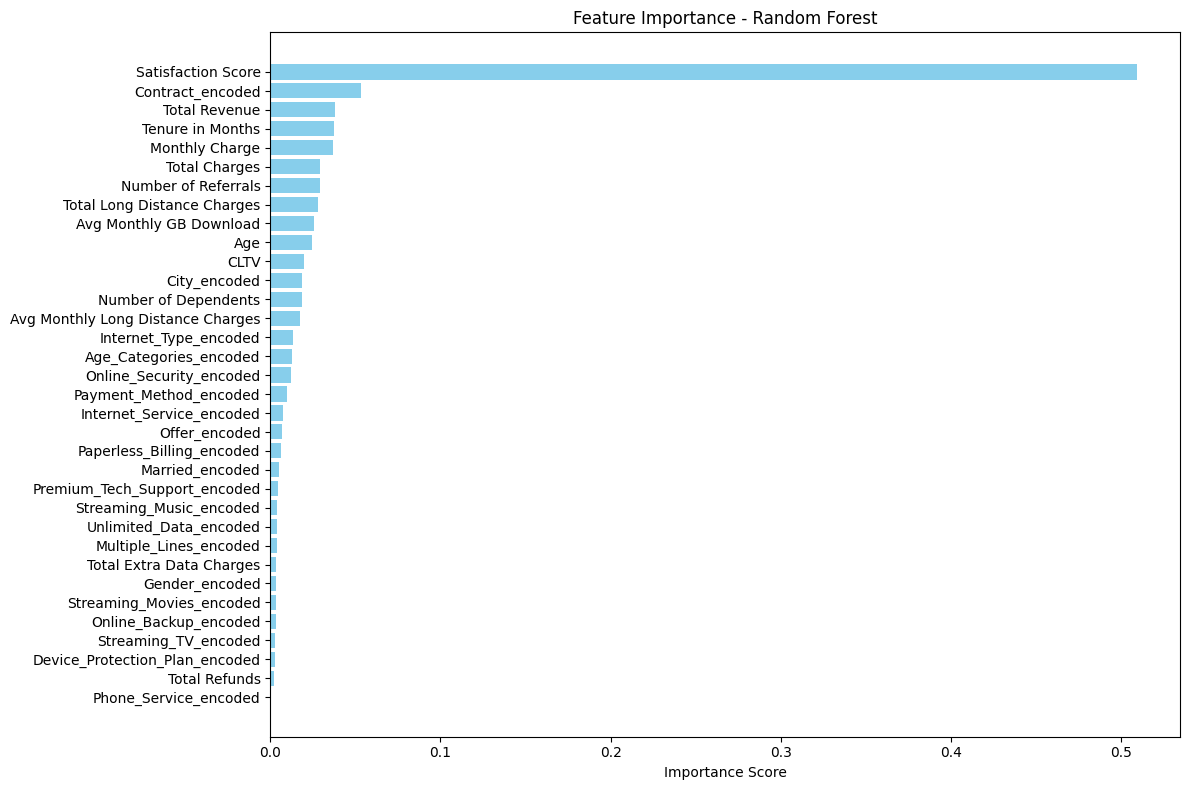

In [34]:
# Get importance scores
importances = model.feature_importances_
features = X_train.columns

# Create dataframe
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [35]:
y_pred = model.predict(X_test)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.950319375443577
Precision: 0.9714285714285714
Recall: 0.85
F1 Score: 0.9066666666666666


In [37]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation Metrics")
print("-" * 30)
print(f"Accuracy  : {accuracy:.2%}")
print(f"Precision : {precision:.2%}")
print(f"Recall    : {recall:.2%}")
print(f"F1 Score  : {f1:.2%}")
print("-" * 30)


Model Evaluation Metrics
------------------------------
Accuracy  : 95.03%
Precision : 97.14%
Recall    : 85.00%
F1 Score  : 90.67%
------------------------------


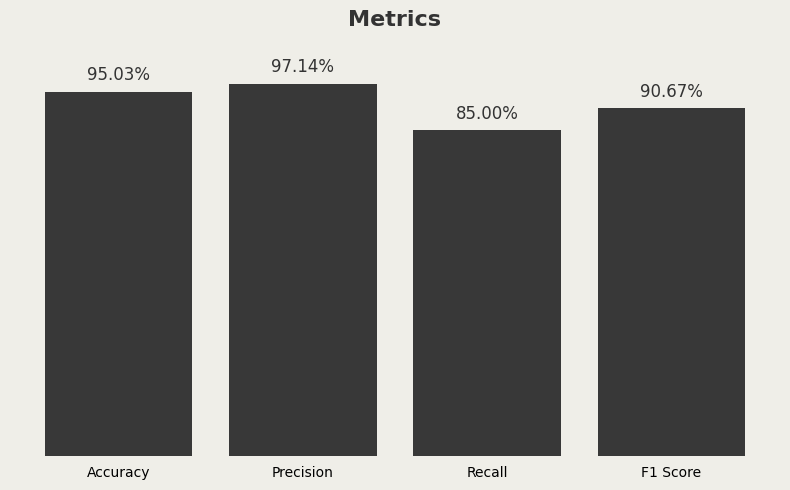

In [64]:
# Compute metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
}

# Colors
bar_color = "#383838"           # Dark gray bars
background_color = "#efeee8"    # Light beige background

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor(background_color)  # Figure background
ax.set_facecolor(background_color)         # Plot area background

# Plot bars
bars = ax.bar(metrics.keys(), metrics.values(), color=bar_color, edgecolor="none")

# Remove all spines (borders)
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove grid, ticks, and y-axis labels
ax.grid(False)
ax.tick_params(left=False, bottom=False)
ax.set_yticklabels([])  # Remove y-axis labels

# Title
plt.title("Metrics", fontsize=16, fontweight='bold', color='#333')

# Show value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.2%}", 
            ha='center', va='bottom', fontsize=12, color='#333')

# Set y-limit to add some space above bars
ax.set_ylim(0, 1.1)

# Tight layout
plt.tight_layout()
plt.show()

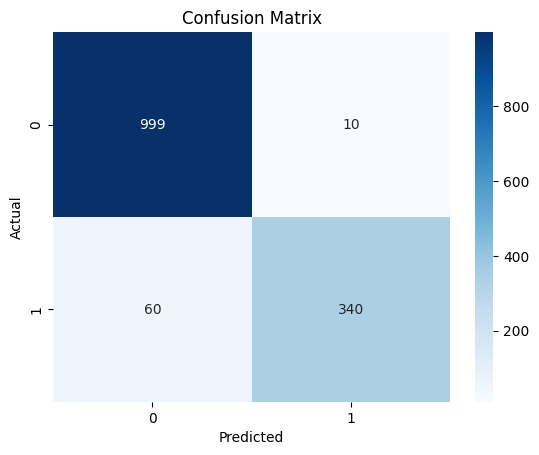

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

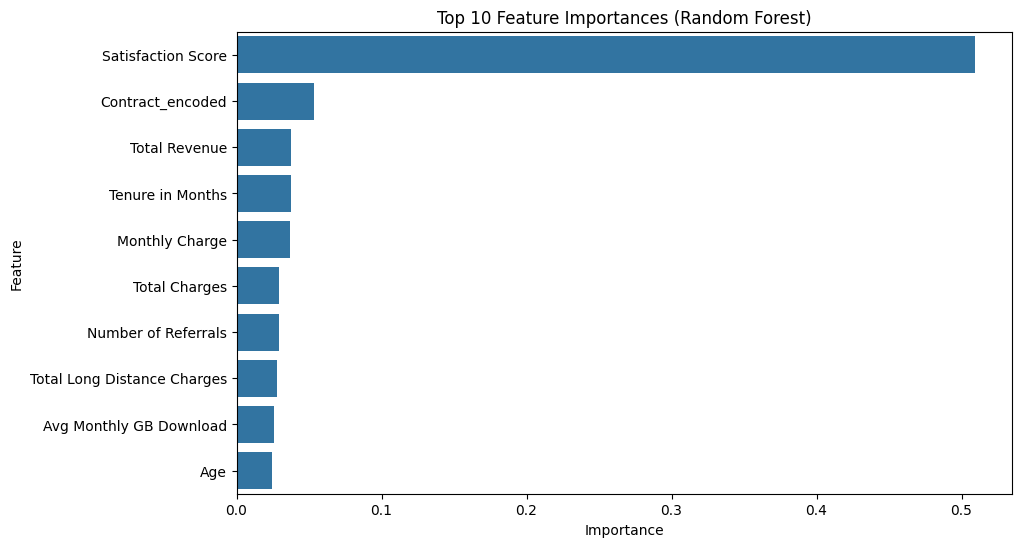

In [40]:
# Get feature importances
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

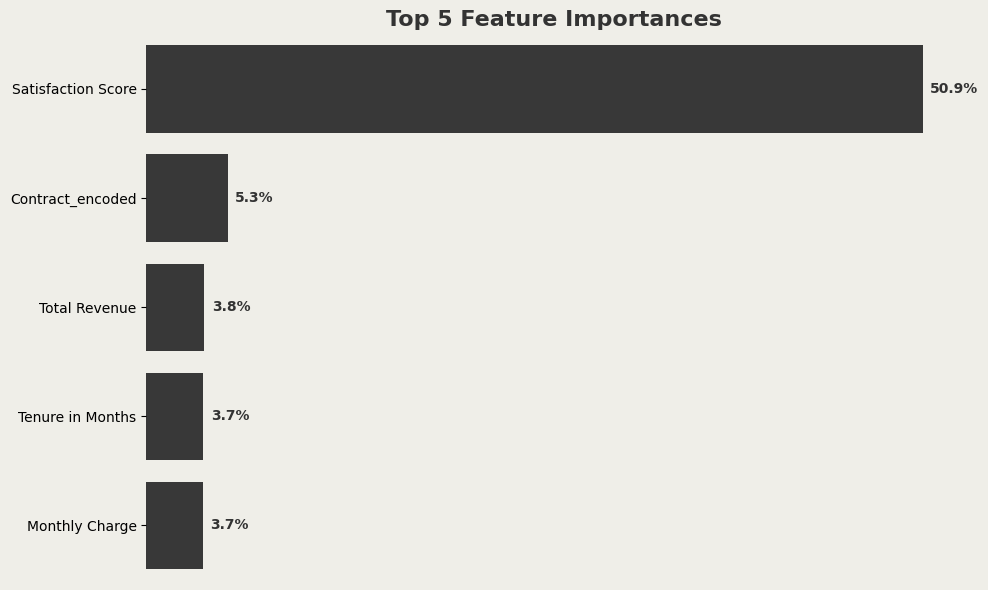

In [69]:
# Get feature importances and normalize to percentage
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

top_n = 5
top_features = features[indices][:top_n]
top_importances = importances[indices][:top_n] * 100  # Convert to percentage

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#efeee8')
ax.set_facecolor('#efeee8')

# Bar plot
sns.barplot(x=top_importances, y=top_features, color="#383838", ax=ax)

# Label values on bars
for i, v in enumerate(top_importances):
    ax.text(v + 0.5, i, f"{v:.1f}%", color='#333', fontweight='bold', va='center')

# Title
ax.set_title("Top 5 Feature Importances", fontsize=16, fontweight="bold", color="#333")

# Remove x-axis title and ticks
ax.set_xlabel("")
ax.set_xticks([])

# Keep y-axis labels, remove title
ax.set_ylabel("")
ax.tick_params(left=True, bottom=False)

# Remove border and grid
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.show()

In [41]:
# Predict churn probabilities
df_clean['Churn_Probability'] = model.predict_proba(X)[:, 1]

# Predict churn class (optional)
df_clean['Churn_Predicted'] = model.predict(X)

In [42]:
# Set threshold for high churn risk (you can tweak this threshold)
df_clean['Risk_Level'] = df_clean['Churn_Probability'].apply(
    lambda x: 'High Risk' if x >= 0.6 else 'Low/Medium Risk'
)

In [43]:
# Define high-value customer (top 30% by CLTV)
value_threshold = df_clean['CLTV'].quantile(0.7)

df_clean['Value_Segment'] = df_clean['CLTV'].apply(
    lambda x: 'High Value' if x >= value_threshold else 'Low/Medium Value'
)

In [44]:
def classify_customer(row):
    if row['Risk_Level'] == 'High Risk' and row['Value_Segment'] == 'High Value':
        return '🔥 Priority Retention Target'
    elif row['Risk_Level'] == 'High Risk':
        return '🛑 At-Risk Customer'
    elif row['Value_Segment'] == 'High Value':
        return '💰 Valuable Customer'
    else:
        return '🙂 Standard'

df_clean['Churn_Action_Segment'] = df_clean.apply(classify_customer, axis=1)

In [45]:
df_clean

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,CLTV,City_encoded,Gender_encoded,Married_encoded,Offer_encoded,Phone_Service_encoded,Multiple_Lines_encoded,Internet_Service_encoded,Internet_Type_encoded,Online_Security_encoded,Online_Backup_encoded,Device_Protection_Plan_encoded,Premium_Tech_Support_encoded,Streaming_TV_encoded,Streaming_Movies_encoded,Streaming_Music_encoded,Unlimited_Data_encoded,Contract_encoded,Paperless_Billing_encoded,Payment_Method_encoded,Churn_Label_encoded,Age_Categories_encoded,Churn_Probability,Churn_Predicted,Risk_Level,Value_Segment,Churn_Action_Segment
0,78,0,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65,3,5433,554,1,0,5,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,5,0.94,1,High Risk,High Value,🔥 Priority Retention Target
1,74,1,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10,3,5302,554,0,1,4,1,1,1,2,0,1,0,0,0,0,0,1,0,1,1,1,5,0.81,1,High Risk,High Value,🔥 Priority Retention Target
2,71,3,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88,2,3179,554,1,0,3,1,1,1,2,0,0,0,0,1,1,1,1,0,1,0,1,5,1.00,1,High Risk,Low/Medium Value,🛑 At-Risk Customer
3,78,1,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07,2,5337,448,0,1,2,1,0,1,2,0,1,1,0,1,1,0,1,0,1,0,1,5,0.97,1,High Risk,High Value,🔥 Priority Retention Target
4,80,1,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36,2,2793,1072,0,1,2,1,1,1,2,0,0,0,0,0,0,0,1,0,1,0,1,5,0.96,1,High Risk,Low/Medium Value,🛑 At-Risk Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,30,0,0,72,22.77,0,21.15,1419.40,19.31,0,1639.44,3039.53,5,5306,514,0,0,5,1,0,0,3,0,0,0,0,0,0,0,0,2,1,0,0,1,0.00,0,Low/Medium Risk,High Value,💰 Valuable Customer
7039,38,2,1,24,36.05,24,84.80,1990.50,48.23,0,865.20,2807.47,3,2140,2,1,1,2,1,1,1,0,1,0,1,1,1,1,1,1,1,1,2,0,2,0.02,0,Low/Medium Risk,Low/Medium Value,🙂 Standard
7040,30,2,4,72,29.66,59,103.20,7362.90,45.38,0,2135.52,9453.04,4,5560,22,0,1,5,1,1,1,2,0,1,1,0,1,1,1,1,1,1,1,0,1,0.00,0,Low/Medium Risk,High Value,💰 Valuable Customer
7041,32,2,1,11,0.00,17,29.60,346.45,27.24,0,0.00,319.21,4,2793,26,0,1,5,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0.08,0,Low/Medium Risk,Low/Medium Value,🙂 Standard


# Now Lets make this data ready for visulaiztion after understanding it a bit more

In [46]:
vis = pd.read_csv(filepath)

In [47]:
vis.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [48]:
vis.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [49]:
vis.drop(columns=['Customer ID','Under 30','Senior Citizen'],inplace=True)

In [50]:
vis

,Gender,Age,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,Male,78,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,Female,74,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,Male,71,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,Female,78,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,Female,80,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,30,No,No,0,United States,California,Landers,92285,34.341737,-116.539416,2182,Q3,No,0,72,NaN,Yes,22.77,No,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,Male,38,Yes,Yes,2,United States,California,Adelanto,92301,34.667815,-117.536183,18980,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,Female,30,Yes,Yes,2,United States,California,Amboy,92304,34.559882,-115.637164,42,Q3,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,Female,32,Yes,Yes,2,United States,California,Angelus Oaks,92305,34.167800,-116.864330,301,Q3,Yes,1,11,NaN,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [51]:
vis = transform_coulmn(vis,'Age','Age Categories')

In [52]:
vis

,Gender,Age,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,Age Categories
0,Male,78,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data,65+
1,Female,74,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer,65+
2,Male,71,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer,65+
3,Female,78,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services,65+
4,Female,80,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges,65+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,30,No,No,0,United States,California,Landers,92285,34.341737,-116.539416,2182,Q3,No,0,72,NaN,Yes,22.77,No,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN,25-34
7039,Male,38,Yes,Yes,2,United States,California,Adelanto,92301,34.667815,-117.536183,18980,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN,35-44
7040,Female,30,Yes,Yes,2,United States,California,Amboy,92304,34.559882,-115.637164,42,Q3,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN,25-34
7041,Female,32,Yes,Yes,2,United States,California,Angelus Oaks,92305,34.167800,-116.864330,301,Q3,Yes,1,11,NaN,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN,25-34


#### Lets just add the predications to this dataframe then we can export it to visulize it 

In [53]:
# Predict churn probabilities
vis['Churn_Probability'] = model.predict_proba(X)[:, 1]

# Predict churn class (optional)
vis['Churn_Predicted'] = model.predict(X)

In [54]:
# Set threshold for high churn risk (you can tweak this threshold)
vis['Risk_Level'] = vis['Churn_Probability'].apply(
    lambda x: 'High Risk' if x >= 0.6 else 'Low/Medium Risk'
)

In [55]:
# Define high-value customer (top 30% by CLTV)
value_threshold = vis['CLTV'].quantile(0.7)

vis['Value_Segment'] = vis['CLTV'].apply(
    lambda x: 'High Value' if x >= value_threshold else 'Low/Medium Value'
)

In [56]:
vis['Churn_Action_Segment'] = vis.apply(classify_customer, axis=1)

In [57]:
vis

,Gender,Age,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,Age Categories,Churn_Probability,Churn_Predicted,Risk_Level,Value_Segment,Churn_Action_Segment
0,Male,78,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data,65+,0.94,1,High Risk,High Value,🔥 Priority Retention Target
1,Female,74,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer,65+,0.81,1,High Risk,High Value,🔥 Priority Retention Target
2,Male,71,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer,65+,1.00,1,High Risk,Low/Medium Value,🛑 At-Risk Customer
3,Female,78,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services,65+,0.97,1,High Risk,High Value,🔥 Priority Retention Target
4,Female,80,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges,65+,0.96,1,High Risk,Low/Medium Value,🛑 At-Risk Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,30,No,No,0,United States,California,Landers,92285,34.341737,-116.539416,2182,Q3,No,0,72,NaN,Yes,22.77,No,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN,25-34,0.00,0,Low/Medium Risk,High Value,💰 Valuable Customer
7039,Male,38,Yes,Yes,2,United States,California,Adelanto,92301,34.667815,-117.536183,18980,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN,35-44,0.02,0,Low/Medium Risk,Low/Medium Value,🙂 Standard
7040,Female,30,Yes,Yes,2,United States,California,Amboy,92304,34.559882,-115.637164,42,Q3,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN,25-34,0.00,0,Low/Medium Risk,High Value,💰 Valuable Customer
7041,Female,32,Yes,Yes,2,United States,California,Angelus Oaks,92305,34.167800,-116.864330,301,Q3,Yes,1,11,NaN,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN,25-34,0.08,0,Low/Medium Risk,Low/Medium Value,🙂 St

### Now we export the model as well

In [58]:
#with open('random_forest_model.pkl', 'wb') as file:
    #pickle.dump(model, file)

In [59]:
vis.dtypes

Gender                                object
Age                                    int64
Married                               object
Dependents                            object
Number of Dependents                   int64
Country                               object
State                                 object
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Population                             int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthl

In [60]:
vis["Age Categories"] = vis["Age Categories"].astype(str)

In [61]:
vis["Age Categories"] = "AgeGroup_" + vis["Age Categories"]

In [62]:
#vis.to_excel("Viusaliztion.xlsx", index=False)